<a href="https://colab.research.google.com/github/emmt1998/ML-para-Negocios/blob/main/workshop_08/Introducci%C3%B3n_Recomendaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/
!rm -r /content/ML-para-Negocios #remueve el repositorio si es que ya se habia cargado
!git clone https://github.com/emmt1998/ML-para-Negocios.git #copia el repositorio
%cd /content/ML-para-Negocios/workshop_02/ml-latest-small/

/content
rm: cannot remove '/content/ML-para-Negocios': No such file or directory
Cloning into 'ML-para-Negocios'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 194 (delta 7), reused 6 (delta 2), pack-reused 169
Receiving objects: 100% (194/194), 19.91 MiB | 35.40 MiB/s, done.
Resolving deltas: 100% (73/73), done.
/content/ML-para-Negocios/workshop_02/ml-latest-small


In [ ]:
import pandas as pd

peliculas = pd.read_csv("movies.csv")
peliculas.columns = ["peliculaId", "titulo", "generos"]  # renombramos coloumnas
peliculas = peliculas.set_index("peliculaId") # eliminamos indice del dataset
peliculas.head()

,titulo,generos
peliculaId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId", "peliculaId", "nota", "momento"] # renombramos columnas
notas = notas.set_index("usuarioId") # eliminamos indice del dataset
notas.head()

,peliculaId,nota,momento
usuarioId,,,
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815
1,50,5.0,964982931


In [ ]:
notas.describe()

,peliculaId,nota,momento
count,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,3.501557,1.205946e+09
std,35530.987199,1.042529,2.162610e+08
min,1.000000,0.500000,8.281246e+08
25%,1199.000000,3.000000,1.019124e+09
50%,2991.000000,3.500000,1.186087e+09
75%,8122.000000,4.000000,1.435994e+09
max,193609.000000,5.000000,1.537799e+09


# Primera tentativa de recomendación: heurística de total de votos

In [ ]:
total_de_votos = notas["peliculaId"].value_counts()
total_de_votos.head()

356     329
318     317
296     307
593     279
2571    278
Name: peliculaId, dtype: int64

# ¿ Cómo saber títiulo de la película que tiene el código 318 ?

In [ ]:
peliculas.loc[318]

titulo     Shawshank Redemption, The (1994)
generos                         Crime|Drama
Name: 318, dtype: object

# Podemos buscar en internet más información sobre esa película en especial ....
google ... imdb Shawshank Redemption

In [ ]:
peliculas['total_de_votos'] = total_de_votos     # insertamos una nueva columna
peliculas.head()

,titulo,generos,total_de_votos
peliculaId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [ ]:
peliculas.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos
peliculaId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
110,Braveheart (1995),Action|Drama|War,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0


In [ ]:
notas_medias = notas.groupby("peliculaId").mean()["nota"]
notas_medias.head()

peliculaId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [ ]:
peliculas["nota_media"] = notas_medias
peliculas.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


# Segunda heurística: nota media y filtrando los votos

In [ ]:
peliculas.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [ ]:
peliculas.query("total_de_votos >= 10").sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


In [ ]:
peliculas_con_mas_de_50_votos = peliculas.query("total_de_votos >= 50")
peliculas_con_mas_de_50_votos.sort_values("nota_media", ascending = False).head(10)


,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


In [ ]:
yo_vi = [1, 21, 19, 10, 11, 7, 2]
peliculas.loc[yo_vi]

,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [ ]:
aventura_infantil_y_fantasia = peliculas_con_mas_de_50_votos.query("generos=='Adventure|Children|Fantasy'")
aventura_infantil_y_fantasia.drop(yo_vi, errors='ignore').sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


# Collaborative filtering x Content based filtering

# Buscando usuarios "similares"



In [ ]:
from google.colab import files
from IPython.display import Image


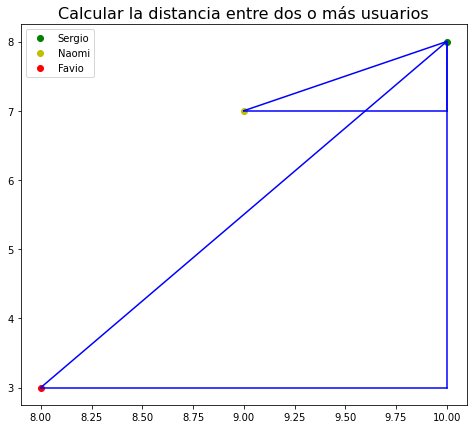

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.plot(10, 8, "go")
plt.plot(9, 7, "yo")
plt.plot(8, 3, "ro")
plt.legend(["Sergio", "Naomi","Favio"])
plt.title("Calcular la distancia entre dos o más usuarios", fontsize='16')

plt.plot([9, 10], [7, 8], color="b", linestyle="-")
plt.plot([9, 10], [7, 7], color="b", linestyle="-")
plt.plot([10, 10], [7, 8], color="b", linestyle="-")

plt.plot([8, 10], [3, 8], color="b", linestyle="-")
plt.plot([8, 10], [3, 3], color="b", linestyle="-")
plt.plot([10, 10],[3, 8], color="b", linestyle="-")


In [ ]:
import numpy as np

sergio = np.array([10, 8])
naomi = np.array([9, 7])
favio = np.array([8, 3])

sergio - naomi, sergio - favio


(array([1, 1]), array([2, 5]))

In [ ]:
from math import sqrt

def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(sergio, naomi)

1.4142135623730951

In [ ]:
def pitagoras(a,b):
  return np.linalg.norm(a - b)

pitagoras(sergio, naomi)

1.4142135623730951

In [ ]:
def distancia(a,b):
  return np.linalg.norm(a - b)

In [ ]:
print('distancia entre Sergio y Naomi= ', distancia(sergio,naomi))
print('distancia entre Sergio y Favio= ', distancia(sergio,favio))

distancia entre Sergio y Naomi=  1.4142135623730951
distancia entre Sergio y Favio=  5.385164807134504


# Redefiniendo la función distancia como distancia_de_vectores

In [ ]:
def distancia_de_vectores(a,b):
  return np.linalg.norm(a - b)

In [ ]:
notas_usuario = notas.query("usuarioId==2")
notas_usuario.head()

,peliculaId,nota,momento
usuarioId,,,
2,318,3.0,1445714835
2,333,4.0,1445715029
2,1704,4.5,1445715228
2,3578,4.0,1445714885
2,6874,4.0,1445714952


In [ ]:
def notas_usuario(usuario):
  notas_usuario = notas.query("usuarioId==%d" % usuario)
  notas_usuario = notas_usuario[["peliculaId", "nota"]].set_index("peliculaId")
  return notas_usuario

In [ ]:
usuario1 = notas_usuario(1)
usuario2 = notas_usuario(85)  # 77, 85

In [ ]:
usuario1.head()

,nota
peliculaId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [ ]:
usuario2.head()

,nota
peliculaId,
53,5.0
314,5.0
515,4.0
527,5.0
538,4.0


# Fusionando el dataframe del usuario 1 con el del usuario 2, para conocer las películas comunes a ambos usuarios

In [ ]:
diferencias = usuario1.join(usuario2, lsuffix="_usuarioA", rsuffix="_usuarioB")
diferencias.head(20)

,nota_usuarioA,nota_usuarioB
peliculaId,,
1,4.0,NaN
3,4.0,NaN
6,4.0,NaN
47,5.0,NaN
50,5.0,NaN
70,3.0,NaN
101,5.0,NaN
110,4.0,NaN
151,5.0,NaN


Eliminando las películas que no son comunes a ambos usuarios tenemos ...

In [ ]:
diferencias = usuario1.join(usuario2, lsuffix="_usuarioA", rsuffix="_usuarioB").dropna()
diferencias.head(10)

,nota_usuarioA,nota_usuarioB
peliculaId,,
527,5.0,5.0


In [ ]:

diferencias = usuario1.join(usuario2, lsuffix="_usuarioA", rsuffix="_usuarioB").dropna()
distancia_de_vectores(diferencias['nota_usuarioA'], diferencias['nota_usuarioB'])

0.0

# Optimizando el código de la función para calcular la distancia entre 2 usuarios, utilizando la variable...<< usuarioId >>, tenemos ... 

In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_usuario(usuario_id1)
  notas2 = notas_usuario(usuario_id2)
  diferencias = notas1.join(notas2, lsuffix="_usuarioA", rsuffix="_usuarioB").dropna()
  return distancia_de_vectores(diferencias['nota_usuarioA'], diferencias['nota_usuarioB'])

In [ ]:
distancia_de_usuarios(1,2)

[1, 77, 0.0]

Vamos a mejorar el código de la función <<< distancia_de_usuarios >>>, retornando los usuarios y la distancia entre ellos ... 

In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_usuario(usuario_id1)
  notas2 = notas_usuario(usuario_id2)
  diferencias = notas1.join(notas2, lsuffix="_usuarioA", rsuffix="_usuarioB").dropna()
  distancia =  distancia_de_vectores(diferencias['nota_usuarioA'], diferencias['nota_usuarioB'])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
distancia_de_usuarios(1,2)

[1, 2, 1.4142135623730951]

Determinando la cantidad de usuarios de nuestro sistema ...

# ¿ Cuáles son los usuarios que existen en nuestro dataset ?

In [ ]:
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId", "peliculaId", "nota", "momento"]  # renombramos columnas
notas['usuarioId']

0           1
1           1
2           1
3           1
4           1
         ... 
100831    610
100832    610
100833    610
100834    610
100835    610
Name: usuarioId, Length: 100836, dtype: int64

In [ ]:
notas['usuarioId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

# Pero ... ¿ cuántos usuarios tenemos ?

In [ ]:
cantidad_de_usuarios = len(notas['usuarioId'].unique())
print("Tenemos %d usuarios" % cantidad_de_usuarios)


Tenemos 610 usuarios


## Luego, si tenemos al usuario 1, tenemos que comparar las distancias con los 609 usuarios restantes respecto del usuario 1 ... Y así vamos haciendo con cada uno de los usuarios del sistema.

In [ ]:
def distancia_de_todos(tu_id):
  distancias = []
  for usuario_id in notas['usuarioId'].unique():
    informaciones = distancia_de_usuarios(tu_id, usuario_id)
    distancias.append(informaciones)
  return distancias

distancia_de_todos(1)[:15]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413],
 [1, 6, 8.602325267042627],
 [1, 7, 7.106335201775948],
 [1, 8, 3.7416573867739413],
 [1, 9, 1.0],
 [1, 10, 7.858116822750856],
 [1, 11, 4.242640687119285],
 [1, 12, 0.7071067811865476],
 [1, 13, 1.4142135623730951],
 [1, 14, 5.0],
 [1, 15, 5.852349955359813]]

Pasando las distancias de una LISTA a un DATAFRAME tenemos ...

In [ ]:
def distancia_de_todos(tu_id):
  todos_los_usuarios = notas['usuarioId'].unique()
  distancias = [distancia_de_usuarios(tu_id, usuario_id) for usuario_id in todos_los_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["tu", "otro_usuario", "distancia"])
  return distancias

distancia_de_todos(1).head(10)

,tu,otro_usuario,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657
5,1,6,8.602325
6,1,7,7.106335
7,1,8,3.741657
8,1,9,1.000000
9,1,10,7.858117


## Ordenando usuarios por DISTANCIA y lidiando con casos extremos ....

# ¿ Qué explicación podemos dar al siguiente cuadro ?

In [ ]:
distancia_de_todos(1).query("distancia==0.00").set_index('tu')

,otro_usuario,distancia
tu,,
1,1,0.0
1,77,0.0
1,85,0.0
1,175,0.0
1,253,0.0
1,291,0.0
1,306,0.0
1,397,0.0
1,496,0.0


Veriquemos si hay películas en comun entre el usuario 1 y el usuario 77, luego entre usuario 1 y usuario 85 ...

In [ ]:
distancia_de_usuarios(1,77)

[1, 77, 0.0]

In [ ]:
distancia_de_usuarios(1,85)

[1, 85, 0.0]

... Rebusquemos un poco más ... y veamos si hay películas en común entre usuario 1 y usuario2, haciendo la fusión de películas en común entre ambos usuarios.

In [ ]:
usuarioA = notas_usuario(1)
usuarioA

,nota
peliculaId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


In [ ]:
for usuario in usuarioA:
    print('usuario:',usuario)

usuario: nota


In [ ]:
usuarioB = notas_usuario(5) # 4  77   85
usuarioB

,nota
peliculaId,
1,4.0
21,4.0
34,4.0
36,4.0
39,3.0
50,4.0
58,5.0
110,4.0
150,3.0


In [ ]:
diferencias = usuarioA.join(usuarioB, lsuffix="_usuarioA", rsuffix="_usuarioB")
diferencias.head(30)

,nota_usuarioA,nota_usuarioB
peliculaId,,
1,4.0,4.0
3,4.0,NaN
6,4.0,NaN
47,5.0,NaN
50,5.0,4.0
70,3.0,NaN
101,5.0,NaN
110,4.0,4.0
151,5.0,NaN


Eliminando las películas que no son comunes a ambos, tenemos ...

In [ ]:
diferencias = usuarioA.join(usuarioB, lsuffix="_usuarioA", rsuffix="_usuarioB").dropna()
diferencias

,nota_usuarioA,nota_usuarioB
peliculaId,,
1,4.0,4.0
50,5.0,4.0
110,4.0,4.0
296,3.0,5.0
316,3.0,2.0
349,4.0,3.0
367,4.0,4.0
457,5.0,4.0
527,5.0,5.0


# Usuarios sin películas vistas en común, son colocados bien distantes uno del otro

In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_usuario(usuario_id1)
  notas2 = notas_usuario(usuario_id2)
  diferencias = notas1.join(notas2, lsuffix="_usuarioA", rsuffix="_usuarioB").dropna()
  
  if(len(diferencias) < minimo):   # ... minimo, que por lo menos tengan 5 peliculas en comun ...
    return [usuario_id1, usuario_id2, 100000]
  
  distancia =  distancia_de_vectores(diferencias['nota_usuarioA'], diferencias['nota_usuarioB'])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
distancia_de_todos(1).head()

,tu,otro_usuario,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


# Encontrando los usuarios más próximos dado, un usuario y ordenanado por distancia ascendente...

In [ ]:
def mas_proximos_de(tu_id):
  distancias = distancia_de_todos(tu_id)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("otro_usuario").drop(tu_id)
  return distancias

In [ ]:
mas_proximos_de(1).head(10)

,tu,distancia
otro_usuario,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000
9,1,1.000000
258,1,1.000000
319,1,1.118034
398,1,1.224745


## Parámetros para probar (testear) ... 

In [ ]:
def mas_proximos_de(tu_id, n = None):
  distancias = distancia_de_todos(tu_id, n = n)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("otro_usuario").drop(tu_id)
  return distancias

In [ ]:
def distancia_de_todos(tu_id, n = None):
  todos_los_usuarios = notas['usuarioId'].unique()
  if n:
    todos_los_usuarios = todos_los_usuarios[:n]
  distancias = [distancia_de_usuarios(tu_id, usuario_id) for usuario_id in todos_los_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["tu", "otro_usuario", "distancia"])
  return distancias

In [ ]:
mas_proximos_de(1, n = 60)

,tu,distancia
otro_usuario,,
49,1,1.000000
9,1,1.000000
25,1,1.414214
13,1,1.414214
30,1,1.802776
26,1,2.236068
35,1,2.236068
52,1,2.549510
56,1,3.316625


## Para descartar aquellos usuarios que están muy distantes, optimizar la función << distancia_de_usuarios >>

In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_usuario(usuario_id1)
  notas2 = notas_usuario(usuario_id2)
  diferencias = notas1.join(notas2, lsuffix="_usuarioA", rsuffix="_usuarioB").dropna()
  
  if(len(diferencias) < minimo):
    return None
  
  distancia =  distancia_de_vectores(diferencias['nota_usuarioA'], diferencias['nota_usuarioB'])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
def distancia_de_todos(tu_id, numero_de_usuarios_a_analizar = None):
  todos_los_usuarios = notas['usuarioId'].unique()
  if numero_de_usuarios_a_analizar:
    todos_los_usuarios = todos_los_usuarios[:numero_de_usuarios_a_analizar]
  distancias = [distancia_de_usuarios(tu_id, usuario_id) for usuario_id in todos_los_usuarios]
  distancias = list(filter(None, distancias))
  distancias = pd.DataFrame(distancias, columns = ["tu", "otro_usuario", "distancia"])
  return distancias

In [ ]:
def mas_proximos_de(tu_id, numero_de_usuarios_a_analizar = None):
  distancias = distancia_de_todos(tu_id, numero_de_usuarios_a_analizar = numero_de_usuarios_a_analizar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("otro_usuario").drop(tu_id)
  return distancias

In [ ]:
mas_proximos_de(1, numero_de_usuarios_a_analizar = 50)

,tu,distancia
otro_usuario,,
49,1,1.000000
9,1,1.000000
25,1,1.414214
13,1,1.414214
30,1,1.802776
35,1,2.236068
26,1,2.236068
46,1,3.316625
8,1,3.741657


In [ ]:
def sugerir_para(tu, numero_de_usuarios_a_analizar = None):
  notas_de_ti = notas_usuario(tu)
  peliculas_que_tu_ya_viste = notas_de_ti.index

  similares = mas_proximos_de(tu, numero_de_usuarios_a_analizar = numero_de_usuarios_a_analizar)
  similar = similares.iloc[0].name
  notas_usuario_similar = notas_usuario(similar)
  notas_usuario_similar = notas_usuario_similar.drop(peliculas_que_tu_ya_viste, errors='ignore')
  recomendaciones = notas_usuario_similar.sort_values("nota", ascending=False)
  return recomendaciones.join(peliculas)

In [ ]:
sugerir_para(1, numero_de_usuarios_a_analizar=50).head()

,nota,titulo,generos,total_de_votos,nota_media
peliculaId,,,,,
1200,4.5,Aliens (1986),Action|Adventure|Horror|Sci-Fi,126.0,3.964286
4022,4.5,Cast Away (2000),Drama,100.0,3.700000
47099,4.5,"Pursuit of Happyness, The (2006)",Drama,46.0,3.793478
79132,4.5,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
109487,4.5,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151


In [ ]:
sugerir_para(1).head(15)

,nota,titulo,generos,total_de_votos,nota_media
peliculaId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984
5378,5.0,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX,92.0,3.157609
8961,5.0,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,125.0,3.836000
5816,5.0,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy,102.0,3.598039
5952,5.0,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,188.0,4.021277
